<a href="https://colab.research.google.com/github/iceking-1912/spicy-genre-reccomic/blob/master/spotify_genre_segmentation_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px



In [3]:
df = pd.read_csv('spotify_dataset.csv')


In [4]:
df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


from matplotlib import pyplot as plt
_df_0['track_popularity'].plot(kind='hist', bins=20, title='track_popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['danceability'].plot(kind='hist', bins=20, title='danceability')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['energy'].plot(kind='hist', bins=20, title='energy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['key'].plot(kind='hist', bins=20, title='key')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('track_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('track_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('track_artist').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('track_album_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='track_popularity', y='danceability', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='danceability', y='energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='energy', y='key', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='key', y='loudness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['track_album_release_date']
  ys = series['track_popularity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('track_album_release_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('track_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='track_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('track_album_release_date')
_ = plt.ylabel('track_popularity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['track_album_release_date']
  ys = series['track_popularity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('track_album_release_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('track_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='track_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('track_album_release_date')
_ = plt.ylabel('track_popularity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['track_album_release_date']
  ys = series['track_popularity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('track_album_release_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('track_artist')):
  _plot_series(series, series_name, i)
  fig.legend(title='track_artist', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('track_album_release_date')
_ = plt.ylabel('track_popularity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['track_album_release_date']
  ys = series['track_popularity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('track_album_release_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('track_album_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='track_album_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('track_album_release_date')
_ = plt.ylabel('track_popularity')

from matplotlib import pyplot as plt
_df_16['track_popularity'].plot(kind='line', figsize=(8, 4), title='track_popularity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['danceability'].plot(kind='line', figsize=(8, 4), title='danceability')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['energy'].plot(kind='line', figsize=(8, 4), title='energy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['key'].plot(kind='line', figsize=(8, 4), title='key')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['track_name'].value_counts()
    for x_label, grp in _df_20.groupby('track_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('track_id')
_ = plt.ylabel('track_name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['track_artist'].value_counts()
    for x_label, grp in _df_21.groupby('track_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('track_name')
_ = plt.ylabel('track_artist')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['track_album_id'].value_counts()
    for x_label, grp in _df_22.groupby('track_artist')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('track_artist')
_ = plt.ylabel('track_album_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['track_album_name'].value_counts()
    for x_label, grp in _df_23.groupby('track_album_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('track_album_id')
_ = plt.ylabel('track_album_name')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['track_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='track_popularity', y='track_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['track_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='track_popularity', y='track_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['track_artist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='track_popularity', y='track_artist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['track_album_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='track_popularity', y='track_album_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

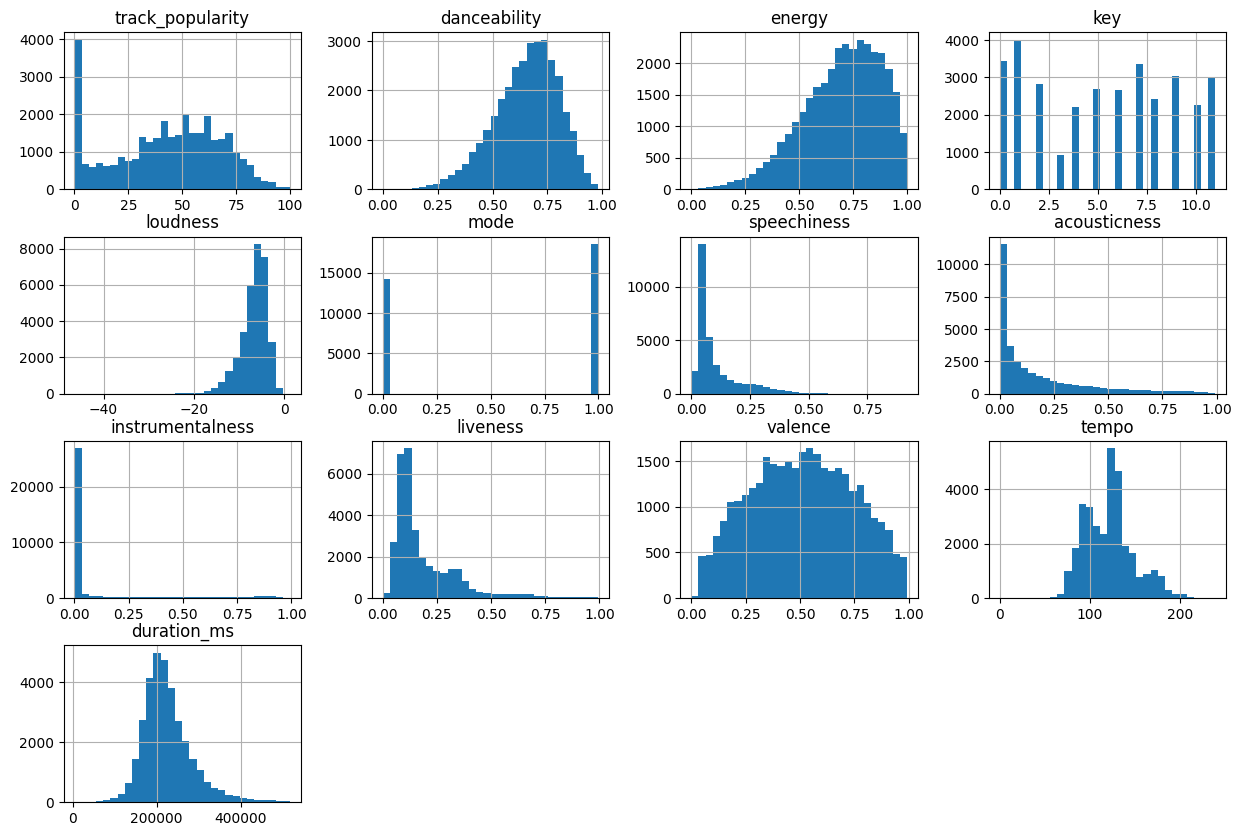

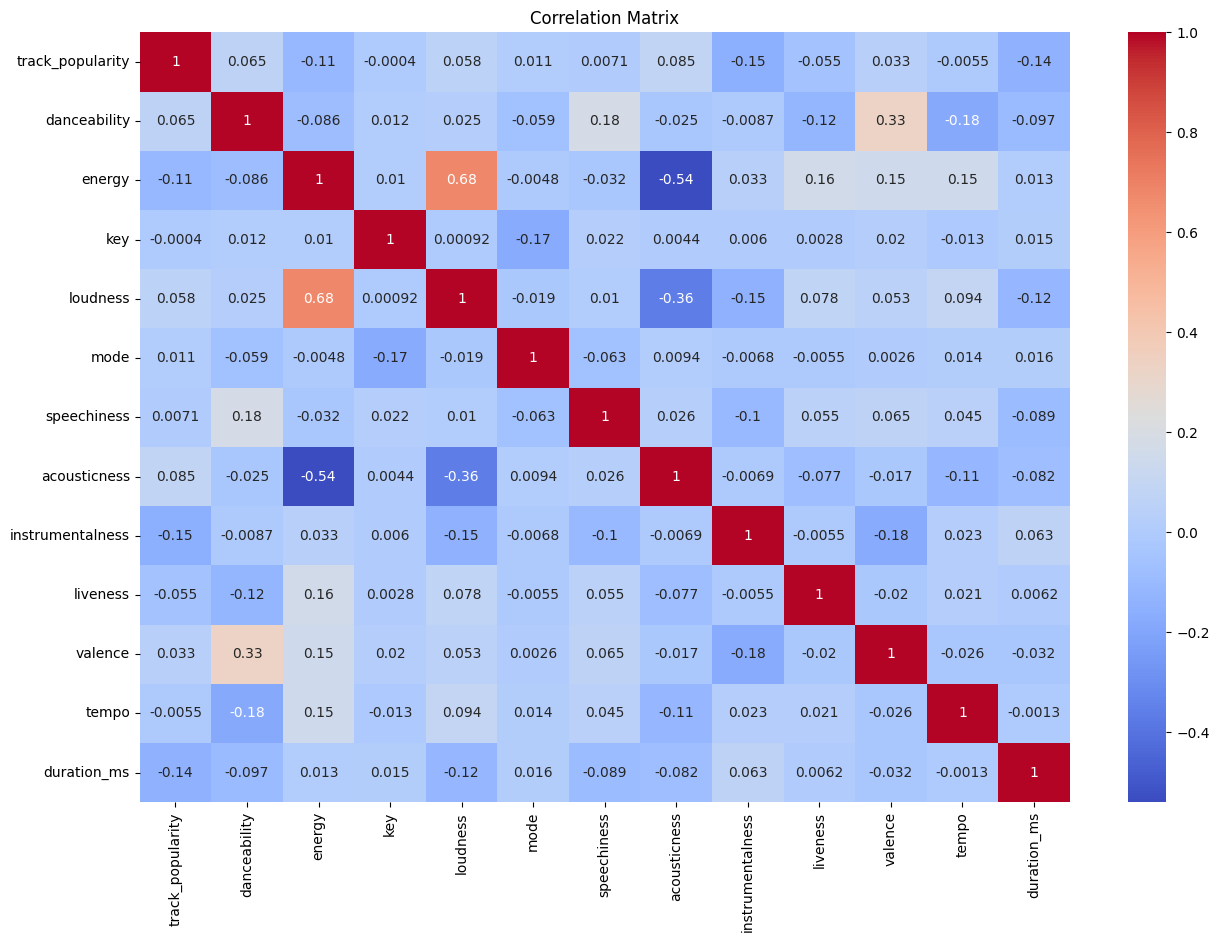

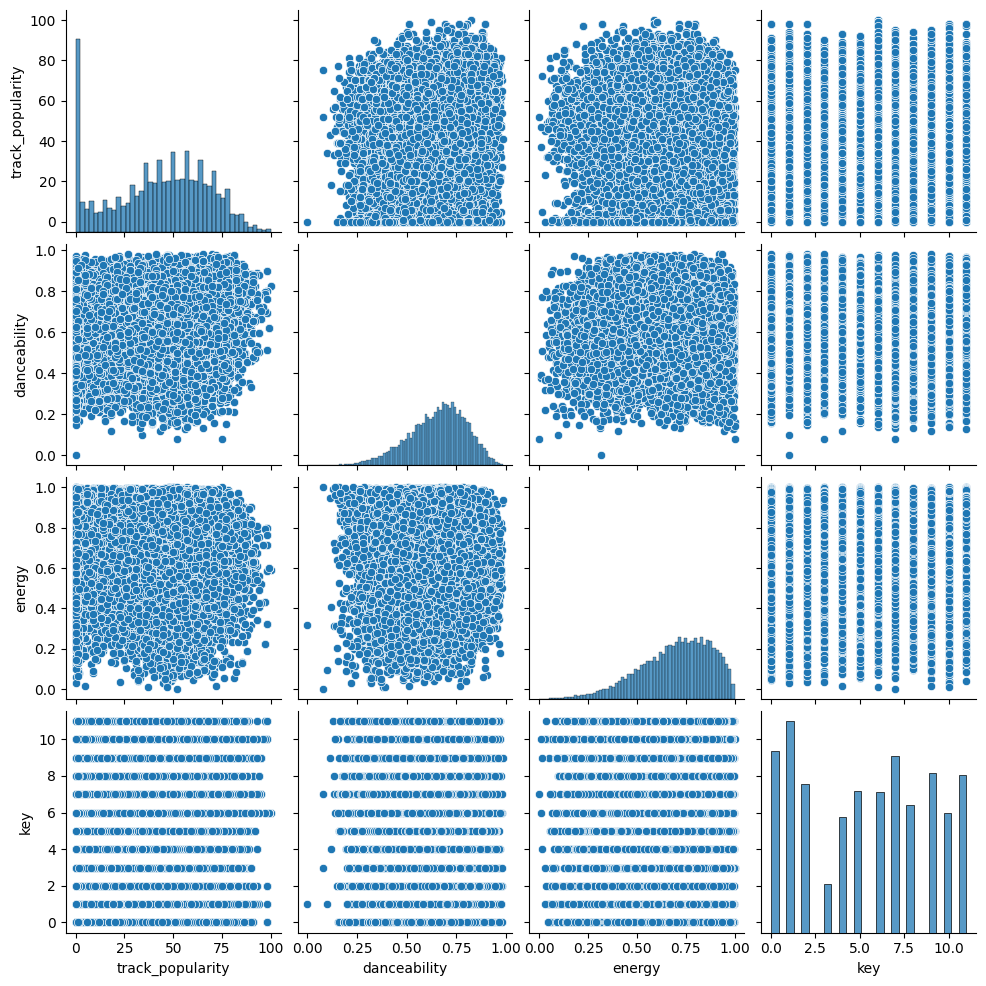

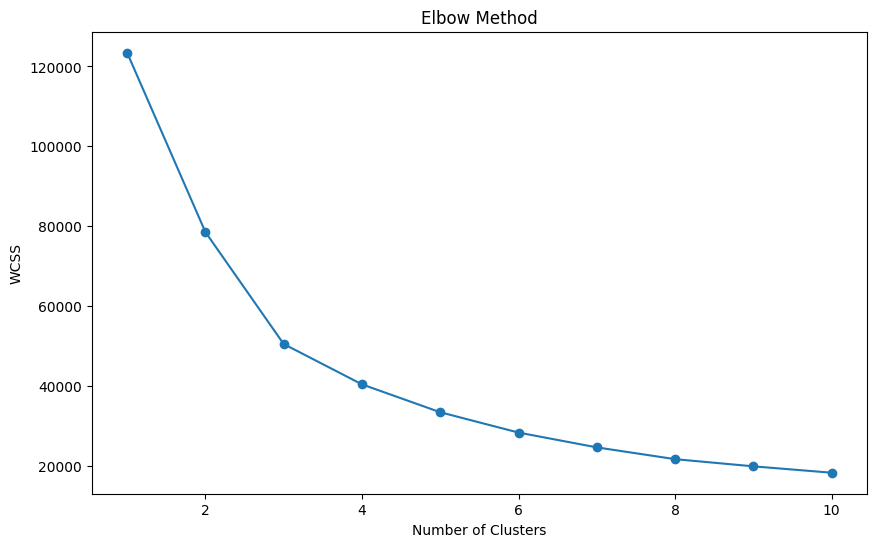

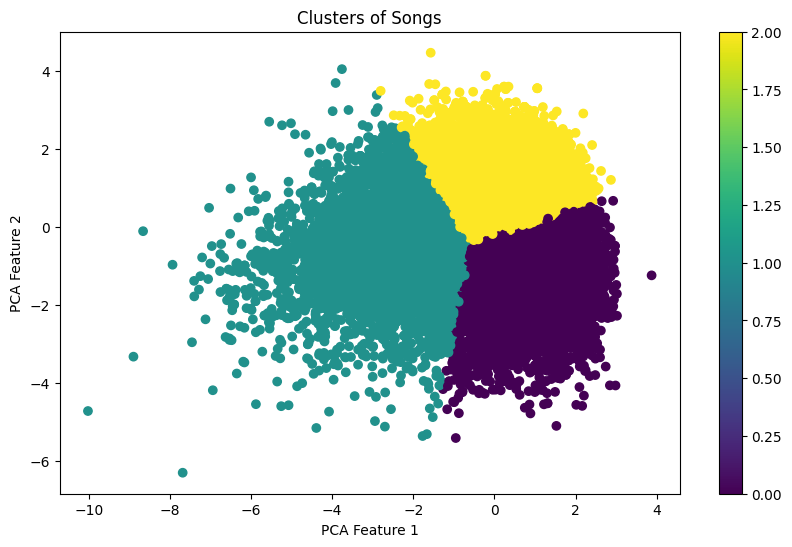

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2278
           1       0.95      0.93      0.94      1304
           2       0.94      0.95      0.94      2984

    accuracy                           0.94      6566
   macro avg       0.94      0.94      0.94      6566
weighted avg       0.94      0.94      0.94      6566



In [ ]:
df.isnull().sum()

df.dropna(inplace=True)

df.duplicated().sum()

df.drop_duplicates(inplace=True)

df.hist(bins=30, figsize=(15,10))
plt.show()
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(df[['track_popularity', 'danceability', 'energy', 'key']])
plt.show()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number
]))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

wcss = []
for i in range(1,
11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,
6))
plt.plot(range(1,
11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_features)

plt.figure(figsize=(10,6))
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Clusters of Songs')
plt.colorbar()
plt.show()

df['Cluster'] = clusters

fig = px.scatter(df, x=pca_features[
    : ,
    0
], y=pca_features[
    : ,
    1
], color=df['Cluster'
].astype(str),
                 title='Clusters of Songs', labels={'x': 'PCA Feature 1', 'y': 'PCA Feature 2'
})
fig.show()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = scaled_features
y = df['Cluster'
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


In [ ]:
def recommend_songs(song_index, num_recommendations=5):
    """Recommends similar songs based on cluster membership."""

    try:
        song_cluster = df['Cluster'][song_index]
    except KeyError:
        return "Invalid song index."


    similar_songs = df[df['Cluster'] == song_cluster]
    similar_songs = similar_songs[similar_songs.index != song_index] # Exclude the input song

    if similar_songs.empty:
        return "No similar songs found in this cluster."

    from sklearn.metrics.pairwise import cosine_similarity
    input_song_features = scaled_features[song_index].reshape(1, -1)  # Reshape for cosine_similarity
    similarities = cosine_similarity(input_song_features, scaled_features[similar_songs.index])

    top_indices = np.argsort(similarities[0])[::-1][:num_recommendations]
    recommended_songs = similar_songs.iloc[top_indices]

    return recommended_songs[['track_name','playlist_genre']]
song_index = 767 
recommendations = recommend_songs(song_index)
print(recommendations)

                            track_name playlist_genre
3065                          The Sign            pop
30694                    Hotline Bling            edm
390                       LOVE + PARTY            pop
21274  En La Cama (feat. Daddy Yankee)          latin
16780                         Narcotic          latin
